<a href="https://colab.research.google.com/github/Saketh-Ayyagari/Machine-Learning-Movement-Detection/blob/master/Machine_Learning_Analysis_for_Movement_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
import sys
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# loading data files as DataFrames
os.getcwd()
FR_by_trial = pd.read_csv("FR_by_trial.csv")
FR_dir = pd.read_csv("FR_dir.csv") # firing rate of each neuron in each direction
spikes = pd.read_csv("spikes_by_trial.csv") # spike count for each neuron in all 143 trials
direction = pd.read_csv("direction.csv") # direction during each trial


In [ ]:
# Turning DataFrames into Numpy arrays
FR_by_trialA = np.array(FR_by_trial)
FR_dirA = np.array(FR_dir) # firing rate for each neuron when it moved in each direction
spikesA = np.array(spikes) # for each neuron, how many spikes were fired in each trial when the mammal moved?
directionA = np.array(direction).reshape(direction.size) # what direction was the mammal moving in for each trial?
FR_by_trialA.shape


(143, 158)

From this data, we want to obtain a few important parameters

1. The spike count of each neuron when the mammal moves in its PREFERRED direction.

2. The firing rate of each neuron when the mammal moves in its PREFERRED direction.

In [ ]:
data = {"Firing rate at preferred direction": [],
        "Spike count at preferred direction": []}

# Gets the direction the mammal moved in when the firing rate is the highest for each neuron
preferred_direc = FR_dirA.argmax(axis=1).reshape(143) + 1

# goes through direction DataFrame to find trials where the mammal was moving in that direction
neuron_number = 0
for p_direc in preferred_direc:
  # indecies of all the trials where mammal moved in preferred direction of neuron (index = trial # - 1)
  trials = np.where(directionA == p_direc)
  # gets the firing rates and spike counts by trial
  firing_rate_at_preferred_direction = FR_by_trialA[neuron_number][trials]
  spike_count_at_preferred_direction = spikesA[neuron_number][trials]
  neuron_number+=1
  data["Firing rate at preferred direction"].append(np.mean(firing_rate_at_preferred_direction))
  data["Spike count at preferred direction"].append(np.mean(spike_count_at_preferred_direction))



### Using the firing rate and spike count of each neuron at its preferred direction, we will now create a DataFrame containing each neuron's firing rate and spike count when the mammal moves in that neuron's predicted direction (taking an average as well)

In [ ]:
df = pd.DataFrame(data)
print(df)
print(f"Shape of data: {df.shape}")

     Firing rate at preferred direction  Spike count at preferred direction
0                              4.823529                            9.647059
1                             19.750000                           39.500000
2                              2.125000                            4.250000
3                              1.928571                            3.857143
4                              2.659091                            5.318182
..                                  ...                                 ...
138                           22.659091                           45.318182
139                           30.090909                           60.181818
140                            7.812500                           15.625000
141                            1.886364                            3.772727
142                            6.464286                           12.928571

[143 rows x 2 columns]
Shape of data: (143, 2)


In [ ]:
# applying PCA
scaler = StandardScaler()
data_standardized = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)

(143, 2)

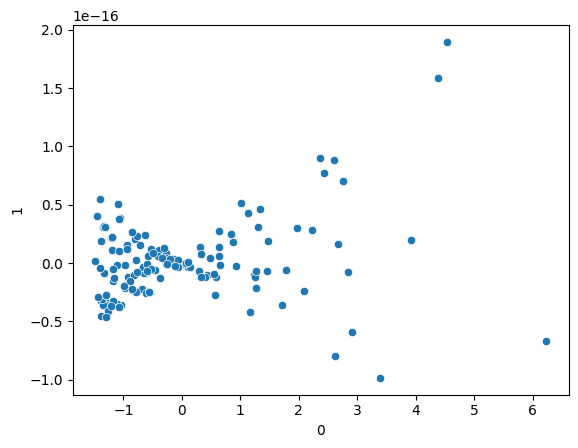

In [ ]:
df_pca = pd.DataFrame(principal_components)
ax = sns.scatterplot(data=df_pca, x=df_pca[0], y=df_pca[1])
df_pca.shape

In [ ]:
explained_variance = pca.explained_variance_
explained_variance

array([2.01408451, 0.        ])

#Work done before Session 8#

Created new data that consists of firing rate at preferred direction, spike count at preferred direction, and max firing rate at the preferred direction.

Using this data will allow for us to predict what direction an organism may move in as a linear combination of these elements and more can help predict the direction of movement given some neuron data.


In [ ]:
fr_new = FR_by_trialA.reshape(143*158) # each entry is one specific neuron followed by one
spike_new = spikesA.reshape(143*158)

data2 = {"Firing rate by trial (new neuron tested every 143 trials)": fr_new,
         "Spike count by trial (new neuron tested every 143 trials)": spike_new, "Direction during trial (LABEL)": 143*list(directionA.reshape(directionA.shape[0]))
         }
df2 = pd.DataFrame(data2)

# pd.read_csv("direction.csv") # shape of (158, 1)--indicates the direction mammal moved at each trial
df2

,Firing rate by trial (new neuron tested every 143 trials),Spike count by trial (new neuron tested every 143 trials),Direction during trial (LABEL)
0,4.0,8,3
1,2.5,5,5
2,2.0,4,5
3,3.5,7,2
4,5.0,10,6
...,...,...,...
22589,6.5,13,2
22590,4.5,9,5
22591,4.5,9,7
22592,4.0,8,1


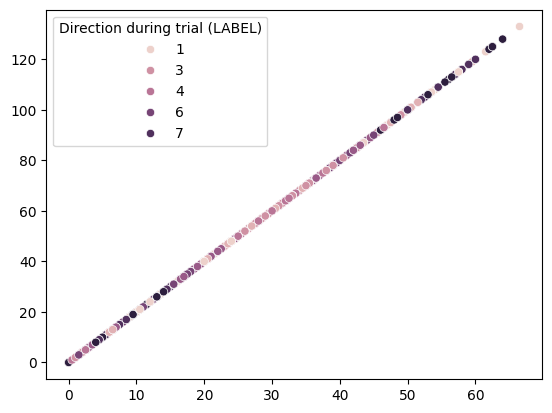

In [ ]:
ax2 = sns.scatterplot(data=data2, x=data2["Firing rate by trial (new neuron tested every 143 trials)"],
                      y=data2["Spike count by trial (new neuron tested every 143 trials)"],
                      hue='Direction during trial (LABEL)')

array([3, 5, 2, 6, 7, 4, 1, 8])

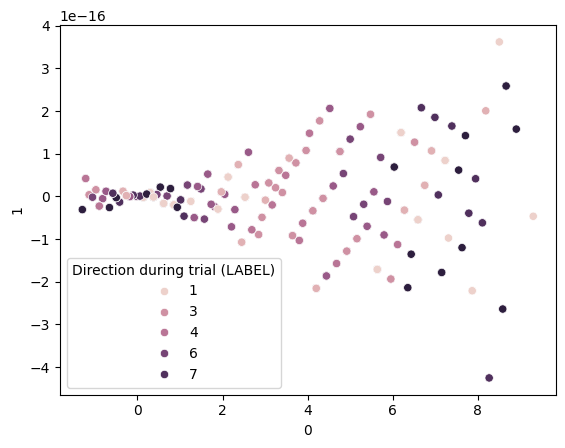

In [ ]:
# PCA
standard = StandardScaler()
inputs = ['Firing rate by trial (new neuron tested every 143 trials)',
          'Spike count by trial (new neuron tested every 143 trials)']
ds2 = standard.fit_transform(df2.loc[:, inputs])

pca2 = PCA(n_components=2)
principal_components2 = pca2.fit_transform(ds2)
label_column = ["Direction during trial (LABEL)", 143*list(directionA.reshape(directionA.shape[0]))]
df2_pca = pd.DataFrame(principal_components2)

ax = sns.scatterplot(data=df2, x=df2_pca[0], y=df2_pca[1], hue='Direction during trial (LABEL)')
df2_pca.insert(2, "Direction during trial (LABEL)", 143*list(directionA.reshape(directionA.shape[0])))
df2_pca["Direction during trial (LABEL)"].unique()

In [ ]:
explained_variance2 = pca2.explained_variance_ratio_
explained_variance2

array([1., 0.])

In [ ]:
# Building neural network
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, InputLayer
from keras import optimizers

### Because our output must be between 1 and 8, we need to create a custom activation function that maps our output between 1 and 8 (where each number represents the direction the mammal is moving in).

### However, our output cannot be a continous softmax function since our outputs are more discrete. Therefore, we need to use a function (round(), floor(), etc.) that makes the output an integer

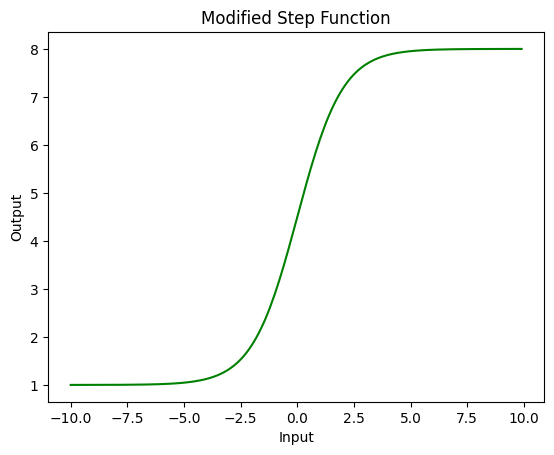

In [ ]:
# Building custom activation function for output
def modified_softmax(x: float): # modifies softmax function to create an output
  return (((7/(1+tf.exp(-x))) + 1))
def modified_step(x: float):
    return tf.round(((8/(1+tf.exp(-x))) + 1))

import matplotlib.pyplot as plt
plt.plot(np.arange(-10,10,0.1), modified_softmax(np.arange(-10,10,0.1)), color='green')
plt.title(f"Modified Step Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

In [ ]:
model = Sequential()
model.add(InputLayer(shape=(2,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.add(Activation(modified_softmax))
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
              metrics=['accuracy'])

In [ ]:
inputs = df2_pca.loc[:, [0, 1]]
labels = df2_pca['Direction during trial (LABEL)']

from sklearn.model_selection import train_test_split
# test train split
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, train_size=0.8, test_size=0.2)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
history.history

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 126
'y' sizes: 18075


In [ ]:
model.predict(X_test)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[5.060478 ],
       [4.9150133],
       [4.9150133],
       ...,
       [5.3164825],
       [4.6201897],
       [4.951537 ]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.floor(y_pred)
accuracy_score(y_test, y_pred)

142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.1301172825846426

In [ ]:
# Plot accuracy
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.show()

# Plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.show()

#Confusion Matrix for Neural Network + PCA#

KeyError: 'val_accuracy'

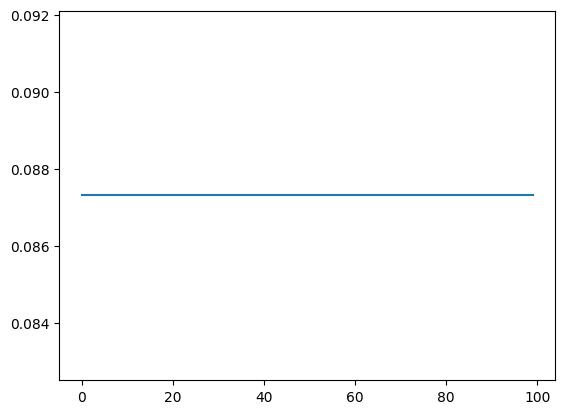

In [ ]:
from sklearn import metrics

#confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = [i for i in range(1, 8+1)])

plot_accuracy(history)
#cm_display.plot()
# plt.show()

### Work done during Session 9
# 8/24/24
### - changed the dataset
### - Utilized one-hot encoding instead of PCA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix


FR_by_trialA_SWAPPED = np.swapaxes(FR_by_trialA, 0, 1) # swap axes
df3 = pd.DataFrame(FR_by_trialA_SWAPPED) # converts swapped-axes array to DataFrame
# adds the label of each trial as another column
df3.insert(143, "Direction during trial (LABEL)", directionA.reshape(directionA.shape[0]))
df3

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,Direction during trial (LABEL)
0,4.0,15.0,2.0,2.0,3.0,0.5,2.5,2.5,0.0,0.0,...,27.0,6.5,17.0,13.5,26.5,31.5,1.5,1.0,2.0,3
1,2.5,18.0,2.0,0.5,1.0,5.0,6.0,0.5,2.5,1.0,...,27.5,6.0,17.5,13.5,21.0,22.0,4.5,0.0,6.0,5
2,2.0,10.5,2.0,1.0,0.5,9.0,5.0,0.0,2.0,1.5,...,24.5,6.5,23.0,15.5,19.5,15.5,3.5,1.0,2.0,5
3,3.5,3.0,3.0,1.0,1.0,10.5,6.5,0.0,0.0,0.5,...,15.0,3.5,22.5,11.5,23.0,25.5,1.5,2.5,7.5,2
4,5.0,9.5,3.5,1.5,2.0,16.5,7.5,5.0,0.5,0.0,...,21.5,3.0,21.5,13.0,13.0,10.5,7.0,1.0,8.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.5,1.5,0.0,1.0,1.0,7.5,2.0,0.5,0.0,0.0,...,21.5,4.5,21.0,14.0,19.0,27.0,4.0,1.5,6.5,2
154,2.0,7.0,0.5,1.0,2.0,3.5,3.0,0.5,1.0,1.5,...,25.5,4.0,23.5,14.5,17.5,17.0,6.5,0.5,4.5,5
155,1.5,5.0,2.0,2.0,2.0,16.0,8.5,1.0,0.5,0.0,...,12.5,6.5,17.5,8.0,9.5,13.0,9.0,1.5,4.5,7
156,6.5,3.0,2.5,0.5,0.5,19.5,6.0,0.0,1.0,0.5,...,19.0,2.5,21.0,12.5,18.0,20.0,7.0,0.0,4.0,1


In [ ]:
# One-hot encode the labels
encoder = LabelBinarizer()
Y = encoder.fit_transform(labels)  # Shape: (158, 8)

inputs = df3.loc[:, [i for i in range(143)]]
outputs = df3.loc[:, ["Direction during trial (LABEL)"]]
# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
# Define the model
model = Sequential([
    Dense(50, input_shape=(143,), activation='relu'),  # First hidden layer
    Dropout(0.3),                                       # Dropout for regularization
    Dense(20, activation='relu'),                       # Second hidden layer
    Dropout(0.3),                                       # Dropout for regularization
    Dense(8, activation='relu'),
    Dense(1),
    Activation(modified_softmax)                      # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history2 = model.fit(X_train, Y_train, epochs=100, batch_size=32)
history2

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0870 - loss: 5.6063e-07
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0891 - loss: 5.6523e-07  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0808 - loss: 5.7851e-07 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0808 - loss: 5.8125e-07 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1058 - loss: 5.6411e-07 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0672 - loss: 5.9466e-07 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1026 - loss: 5.6461e-07 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0943 - loss: 5.6883e-07 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0943 - loss: 5.4797e-07 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0933 - loss: 5.6908e-07 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1058 - loss: 5.7479e-07 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.floor(y_pred)
accuracy_score(Y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


0.09375

KeyError: 'val_accuracy'

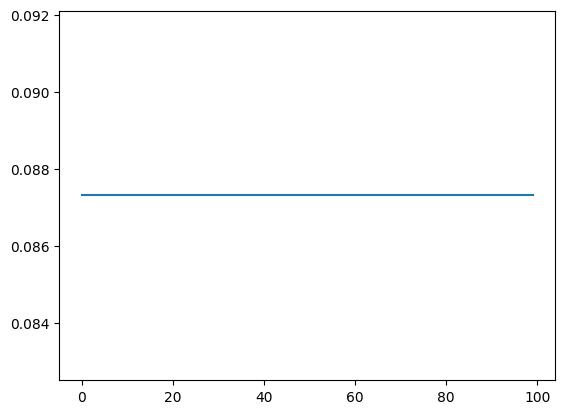

In [ ]:
plot_accuracy(history2)

### Implementing Random Forest Classifier to Predict Movement

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=75, random_state=42)

In [ ]:
inputs = df3.loc[:, [i for i in range(143)]]
outputs = df3.loc[:, ["Direction during trial (LABEL)"]]
# Split the data into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(inputs, outputs, train_size=0.8, test_size=0.2, random_state=42)

In [ ]:
rf_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=75, random_state=42)

In [ ]:
Y_pred = rf_model.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.78125

# Confusion Matrix for Random Forest Classifier #

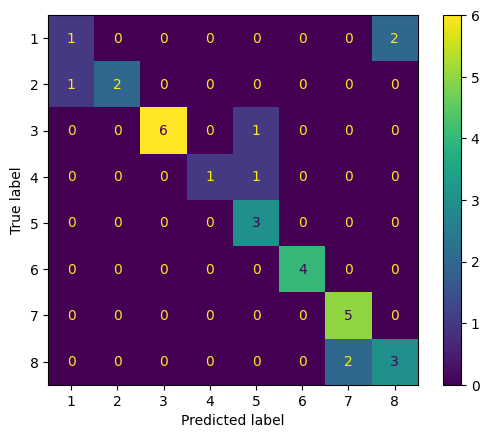

In [ ]:
from sklearn import metrics

actual = Y_test
predicted = Y_pred

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[i for i in range(1, 8+1)])

cm_display.plot()
plt.show()

# Utilizing an SVM for Predicting direction of movement

In [ ]:
from sklearn.svm import SVC as SupportVectorClassifier

In [ ]:
svc = SupportVectorClassifier()
svc = svc.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_pred_svc = svc.predict(X_test)
accuracy_score(y_pred_svc, Y_test)

0.53125